In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\15 days project datasets\Shoe prices.csv")
df

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [89]:
df['Price (USD)'] = df['Price (USD)'].str.replace('$', '').astype(float)

In [90]:
df.groupby('Model')['Price (USD)'].max().sort_values(ascending = False)

Model
ZoomX Vaporfly Next%            250.0
Yeezy Boost 350 V2              220.0
Yeezy Boost 350                 220.0
Legacy Lifter                   200.0
Air Zoom Tempo NEXT% FlyEase    200.0
                                ...  
Dynamight 2.0                    50.0
Authentic                        50.0
Adilette Comfort                 35.0
Adilette Cloudfoam               35.0
Adilette Shower                  25.0
Name: Price (USD), Length: 239, dtype: float64

In [91]:
df[df['Model']=='ZoomX Vaporfly Next%']

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
555,Nike,ZoomX Vaporfly Next%,Running,Men,US 10,Black/White,Mesh,250.0


 - The Nike ZoomX Vaporfly Next%, priced at 250, is the highest-priced product in the dataset. It's a running shoe designed for men with a US 10 size

In [92]:
df.groupby('Gender')['Brand'].value_counts()

Gender  Brand      
Men     Nike           88
        Reebok         75
        Puma           69
        Fila           59
        New Balance    58
        Vans           41
        Asics          41
        Converse       39
        Skechers       36
        Adidas         29
Women   Adidas         71
        Converse       61
        Asics          59
        Vans           59
        Skechers       53
        New Balance    42
        Fila           40
        Puma           31
        Nike           30
        Reebok         25
Name: count, dtype: int64

 - Among men's shoes, Nike is the most popular brand, while for women's shoes, Adidas is the most popular brand.

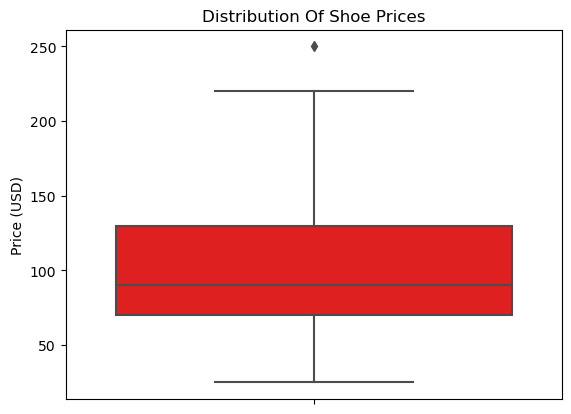

In [93]:
sns.boxplot(y=df['Price (USD)'],color = 'red')
plt.title('Distribution Of Shoe Prices')
plt.show()

 - The majority of shoe prices fall between approximately 100 and 150 USD.
 - There are some outliers priced around 250 USD.

In [94]:
average_prices = df.groupby('Brand')['Price (USD)'].mean().sort_values(ascending=False)

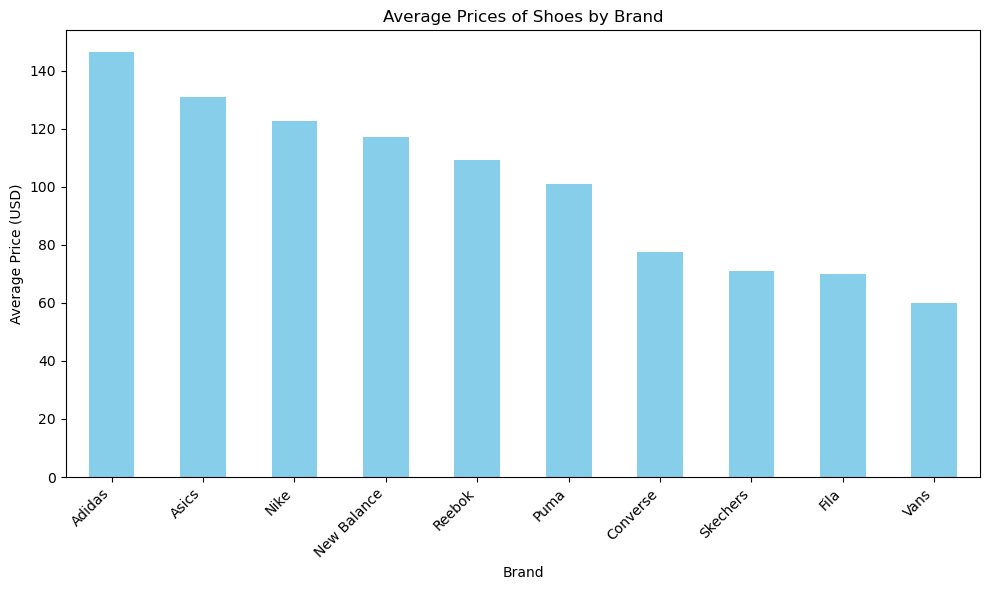

In [95]:
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices of Shoes by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 - Adidas stands out as the brand with the highest average shoe prices.
 - Vans offers the most budget-friendly options among the listed brands.
 - Nike, a popular choice, maintains a slightly lower average price compared to Adidas.
 - Converse, Skechers, and Fila fall within the mid-range in terms of average prices.
 - Popularity and price don't always align, as evidenced by Nike's balance between popularity and affordability.

In [96]:
type_counts = df['Type'].value_counts()
gender_counts = df['Gender'].value_counts()

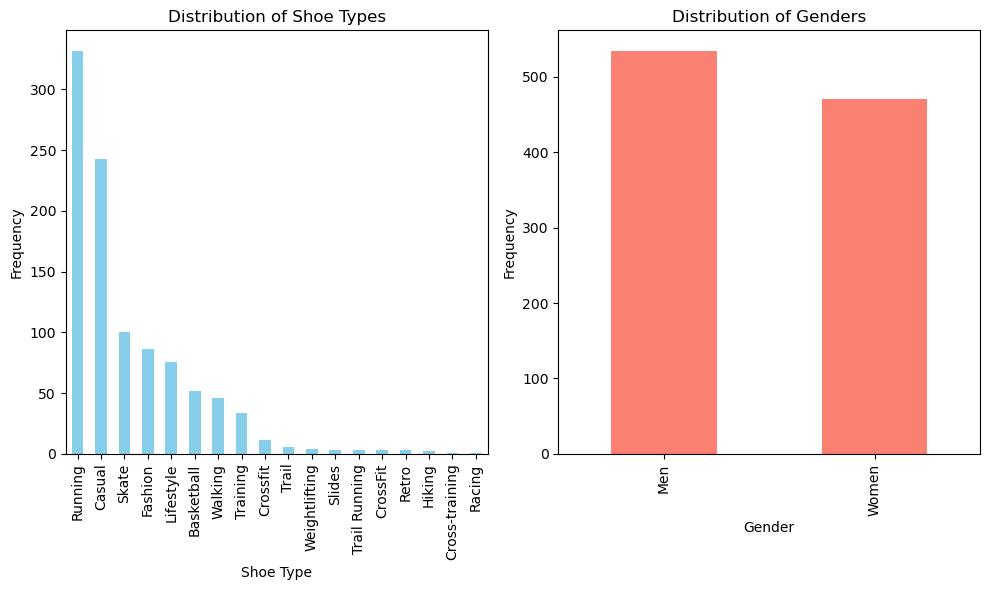

In [97]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Shoe Types')
plt.xlabel('Shoe Type')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 - The most common shoe types are running and casual, while the least common types include weightlifting and slides.
 - In terms of gender, men's shoes are more prevalent compared to women's shoes

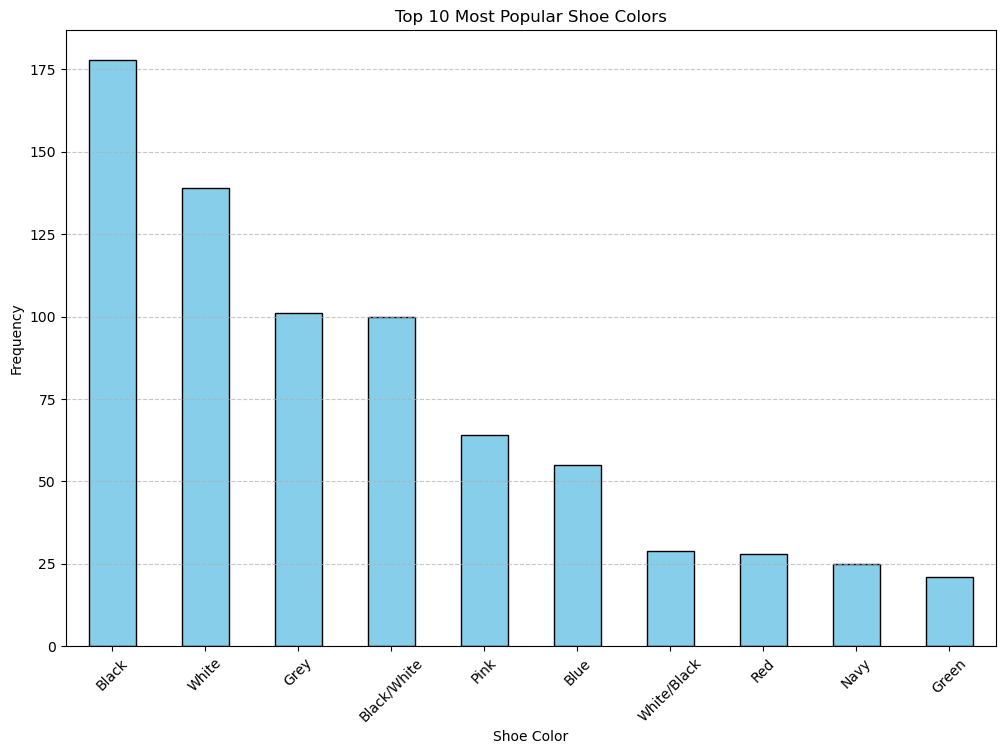

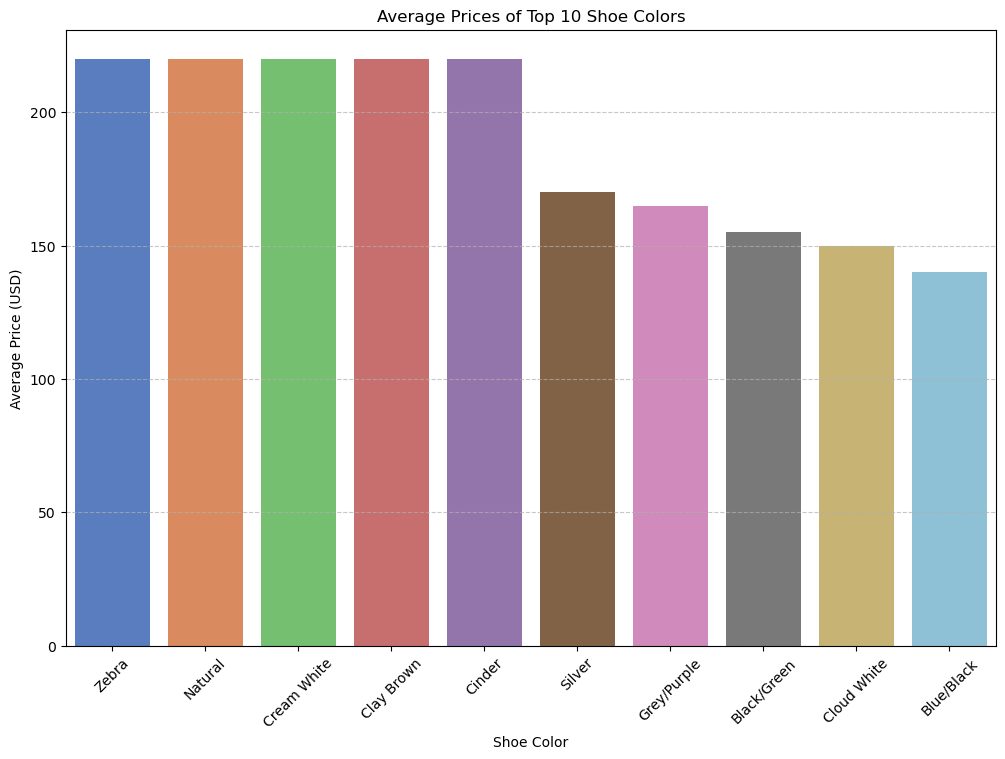

In [98]:
plt.figure(figsize=(12, 8))
color_counts = df['Color'].value_counts().head(10)
color_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Shoe Colors')
plt.xlabel('Shoe Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


average_prices = df.groupby('Color')['Price (USD)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='muted')
plt.title('Average Prices of Top 10 Shoe Colors')
plt.xlabel('Shoe Color')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 - The most popular shoe colors include Black, White, and Grey, with Black being the most common color.
 - In terms of average prices, limited edition colors such as Zebra, Cream White, and Clay Brown tend to have higher prices.
 - Neutral colors like Silver and Cloud White have relatively lower average prices compared to more vibrant or unique color combinations.





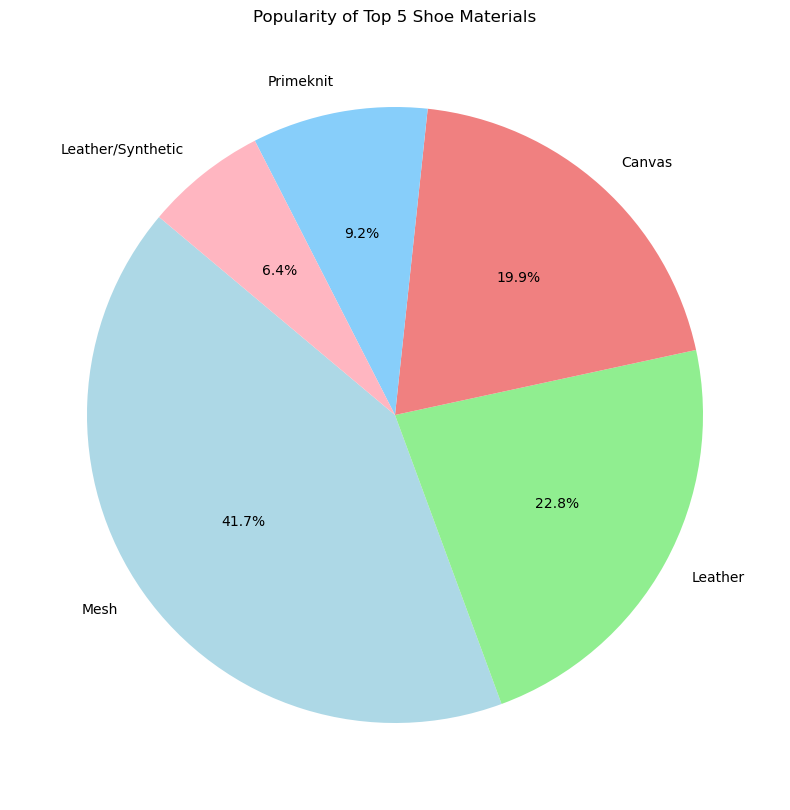

In [99]:
plt.figure(figsize=(10, 10))
material_popularity = df['Material'].value_counts().head(5)
plt.pie(material_popularity, labels=material_popularity.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Popularity of Top 5 Shoe Materials')
plt.show()

 - Mesh is the most common material used in shoes, followed by leather and canvas.
 - Primeknit and leather/synthetic combinations are less frequently used materials.
 - Mesh shoes dominate the market, indicating a preference for lightweight and breathable footwear.
 - Canvas is another common material

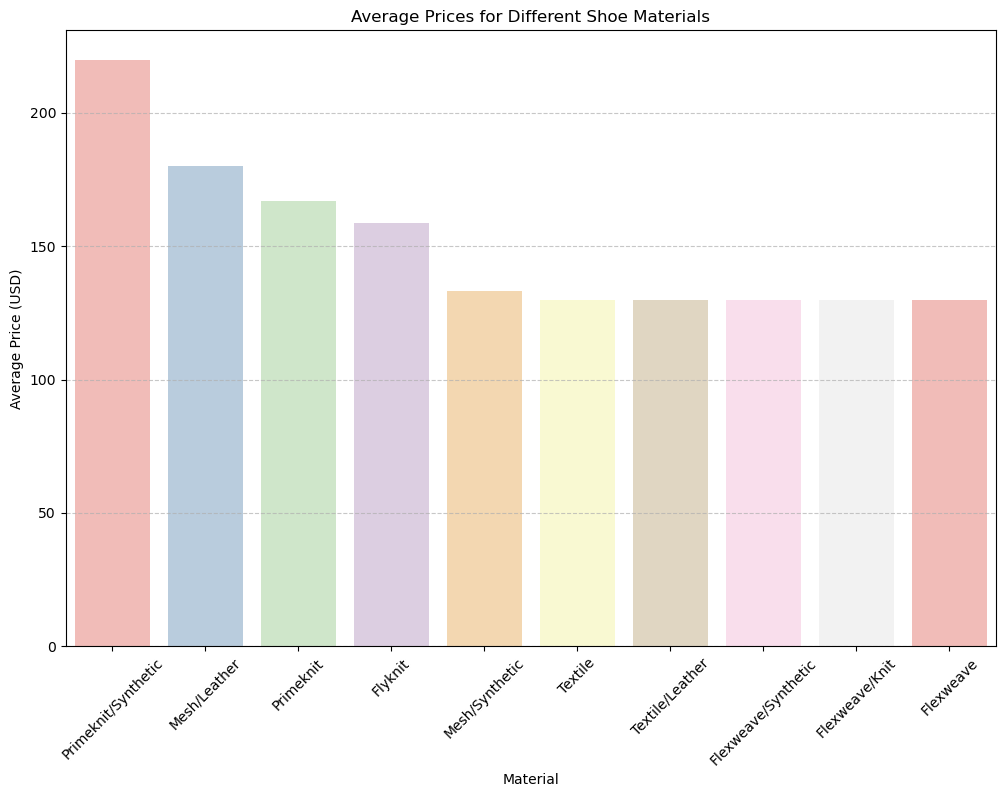

In [100]:
average_prices_material = df.groupby('Material')['Price (USD)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices_material.index, y=average_prices_material.values, palette='Pastel1')
plt.title('Average Prices for Different Shoe Materials')
plt.xlabel('Material')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 - Shoes made of Primeknit/Synthetic material have the highest average price
 - Mesh/Leather shoes also command relatively high prices.
 - Flexweave/Synthetic, Flexweave/Knit, and Flexweave shoes are among the more affordable options.